<a href="https://colab.research.google.com/github/Yamini1226/house/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load data
train = pd.read_csv('/content/house price/test (1).csv')
test = pd.read_csv('/content/house price/test (1).csv')

In [5]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (505, 8)
Test shape: (505, 8)


In [6]:
# Preview data
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [7]:
# Missing values
train.isna().sum()



,0
beds,0
baths,0
size,0
size_units,0
lot_size,77
lot_size_units,77
zip_code,0
price,0


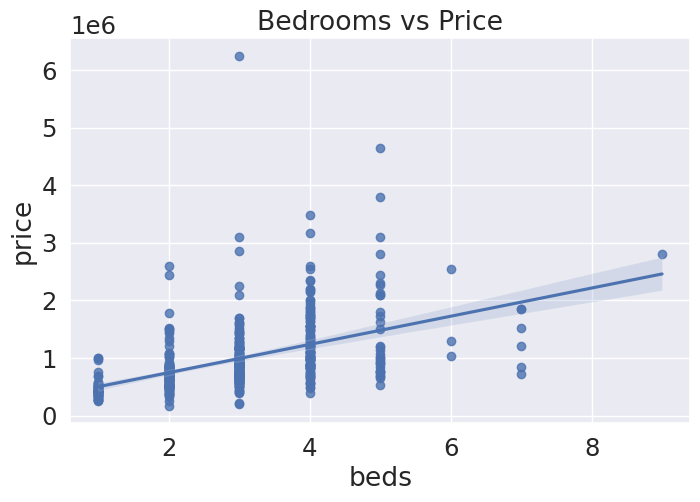

In [8]:
# Set width and height of figure
plt.figure(figsize=(8,5))

# Regplot shows a regression line on top of a scatterplot
sns.regplot(data=train, x='beds',y='price')

# Aesthetics
plt.title('Bedrooms vs Price')
plt.show()

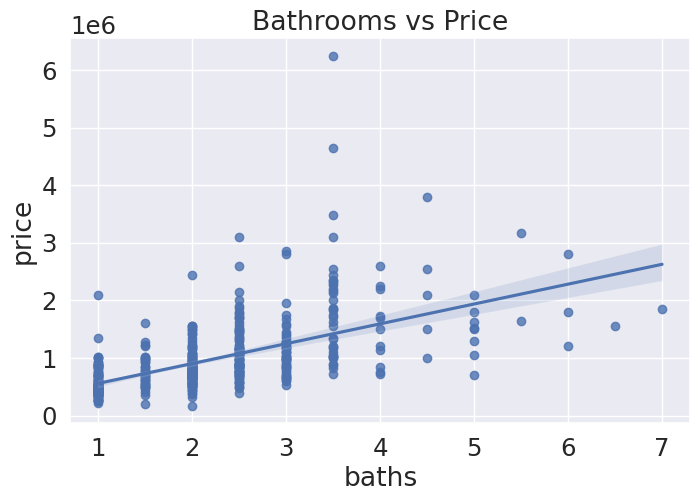

In [9]:


# Set width and height of figure
plt.figure(figsize=(8,5))

# Regplot shows a regression line on top of a scatterplot
sns.regplot(data=train, x='baths',y='price')

# Aesthetics
plt.title('Bathrooms vs Price')
plt.show()

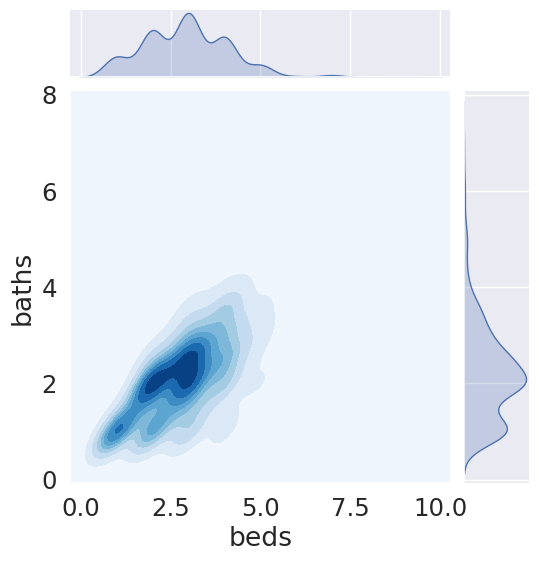

In [10]:
sns.jointplot(x='beds', y='baths', data=train, kind='kde', fill=True, thresh=0, cmap='Blues')

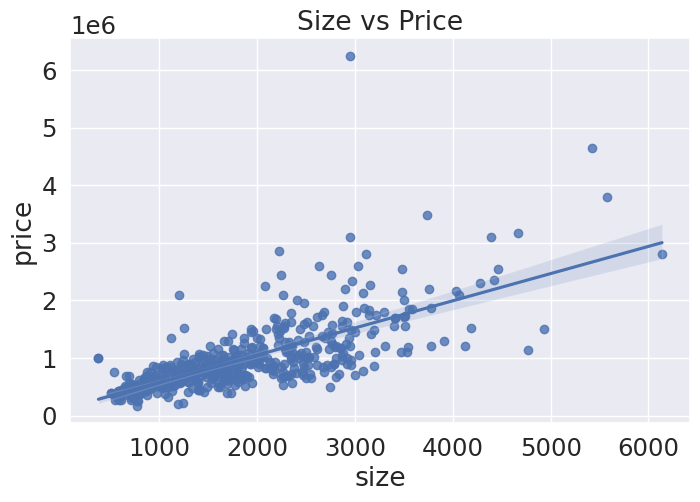

In [11]:
# Set width and height of figure
plt.figure(figsize=(8,5))

# Regplot shows a regression line on top of a scatterplot
sns.regplot(data=train, x='size',y='price')

# Aesthetics
plt.title('Size vs Price')
plt.show()

In [12]:
# Target variable
y = train['price']
y_test = test['price']

In [13]:
y.head(3)

,price
0,1175000.0
1,1057500.0
2,799000.0


In [14]:
# Choose features for model
features_to_use = ['beds','baths','size']

# Model data
X = train[features_to_use]
X_test = test[features_to_use]

In [15]:
X.head(3)

,beds,baths,size
0,3,3.0,2850.0
1,4,5.0,3040.0
2,3,1.0,1290.0


In [16]:
# Define model
model = LinearRegression()

# Train model
model.fit(X,y)

LinearRegression()

In [17]:
# Make predictions
y_preds = model.predict(X_test)

# Evaluate model with RSME
score = mean_squared_error(y_test,y_preds, squared=False)
print('RMSE on test set:', score)

RMSE on test set: 412589.0991320822


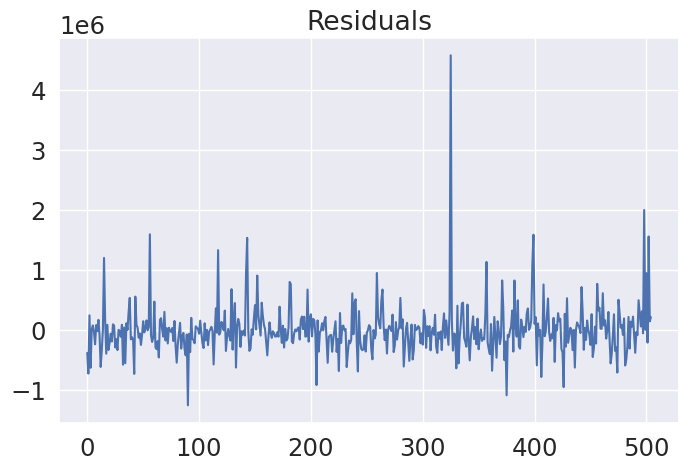

In [18]:


# Residual plot
plt.figure(figsize=(8,5))
plt.plot(y_test-y_preds)
plt.title('Residuals')
plt.show()